# Lab-1 

In [1]:
# Lab 1: Базові алгоритми класифікації з використання бібліотеки Scikit-learn

# Виконати наступне: 
#
# 1) Завантажити дані, вивести назви колонок і розмір датасета
# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)
# 3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
# розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)
# 4) Нормалізувати дані
# 5) Провести навчання наступних класифікаторів:
#
# 	kNN
# 	дерево прийняття рішень
# 	SVM
# 	Random Forest
# 	AdaBoost

# Підібрати оптимальні параметри
# 	• для kNN
# 	• для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

# Серед обраних оптимальних моделей кожного класу вибрати найкращу.

# Відобразити
#
# sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

# Опис завантажених даних

In [2]:
# Історія набору даних:

# Інсульт – це медичний стан, при якому поганий кровообіг у мозку викликає загибель клітин. Існує два основних типи інсульту: ішемічний, спричинений недостатністю кровотоку, і геморагічний, спричинений кровотечею. Обидва призводять до того, що частини мозку перестають функціонувати належним чином. Ознаки та симптоми інсульту можуть включати нездатність рухатися або відчувати одну сторону тіла, проблеми з розумінням або розмовою, запаморочення або втрату зору на одну сторону. Ознаки та симптоми часто з’являються незабаром після інсульту. Якщо симптоми тривають менше однієї-двох годин, інсульт є транзиторною ішемічною атакою (ТІА), яку також називають міні-інсультом. Геморагічний інсульт також може супроводжуватися сильним головним болем. Симптоми інсульту можуть бути постійними. Довгострокові ускладнення можуть включати пневмонію та втрату контролю над сечовим міхуром.

# Основним фактором ризику інсульту є високий артеріальний тиск. Інші фактори ризику включають високий рівень холестерину в крові, куріння, ожиріння, цукровий діабет, перенесену в минулому ТІА, термінальну стадію захворювання нирок і фібриляцію передсердь. Ішемічний інсульт зазвичай спричинений закупоркою кровоносної судини, хоча існують і менш поширені причини. Геморагічний інсульт викликається кровотечею безпосередньо в мозок або в простір між оболонками головного мозку. Через розрив аневризми головного мозку може виникнути кровотеча. Діагноз зазвичай базується на фізичному огляді та підтверджується медичними зображеннями, такими як КТ або МРТ. КТ може виключити кровотечу, але не обов’язково виключити ішемію, яка на ранній стадії зазвичай не виявляється на КТ. Інші тести, такі як електрокардіограма (ЕКГ) і аналізи крові, проводяться для визначення факторів ризику та виключення інших можливих причин. Низький рівень цукру в крові може викликати подібні симптоми.

# Профілактика включає зменшення факторів ризику, хірургічне втручання для відкриття артерій до мозку в тих, хто має проблемне звуження сонної артерії, і варфарин у людей з фібриляцією передсердь. Для профілактики лікарі можуть рекомендувати аспірин або статини. Інсульт або ТІА часто потребують невідкладної допомоги. Ішемічний інсульт, якщо його виявлено протягом трьох-чотирьох з половиною годин, можна вилікувати за допомогою ліків, які можуть розщепити тромб. Деякі геморагічні інсульти допомагають від хірургічного втручання. Лікування, спрямоване на відновлення втраченої функції, називається реабілітацією після інсульту та в ідеалі проводиться в інсультному відділенні; однак вони недоступні в більшості країн світу.

# Інформація про атрибути
# 1) стать: «Чоловік», «Жінка» або «Інше»
# 2) вік: вік пацієнта
# 3) гіпертонія: 0, якщо у пацієнта немає гіпертонії, 1, якщо у пацієнта гіпертонія
# 4) захворювання серця: 0, якщо у пацієнта немає захворювань серця, 1 якщо у пацієнта є захворювання серця 5) був коли-небудь одружений: «Ні» або «Так»
# 6) тип роботи: «діти», «Державний», «Ніколи не працював», «Приватний» або «самозайнятий» 7) Тип проживання: «Сільський» або «Міський»
# 8) середній рівень глюкози: середній рівень глюкози в крові
# 9) ІМТ: індекс маси тіла
# 10) статус_куріння: «раніше курив», «ніколи не курив», «курить» або "Невідомо"*
# 11) штрих:1, якщо у пацієнта був інсульт, або 0, якщо ні

# *Примітка: «Невідомо» в smoking_status означає, що інформація для цього пацієнта недоступна

# Посилання на dataset

In [3]:
# Brain Stroke Dataset:
# https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

# Code

In [4]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


DATA_PATH = 'brain_stroke.csv'

dataset = pd.read_csv(DATA_PATH)
temp_detaset=copy.deepcopy(dataset)
display(dataset)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [5]:
display(dataset.info())
display(dataset.describe())
dataset.isnull().sum()

# list(dataset.columns.values.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


None

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
gender_type_labels = dataset['gender'].unique()
ever_married_type_labels = dataset['ever_married'].unique()
work_type_labels = dataset['work_type'].unique()
resident_type_labels = dataset['Residence_type'].unique()
smoking_status_labels = dataset['smoking_status'].unique()

print('Gender type values:', gender_type_labels)
print('Ever married type values:', ever_married_type_labels)
print('Work type values:', work_type_labels)
print('Residence type values:', resident_type_labels)
print('Smoking status values:', smoking_status_labels)

Gender type values: ['Male' 'Female']
Ever married type values: ['Yes' 'No']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence type values: ['Urban' 'Rural']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

dataset.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


# Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.026538,-0.021485,-0.086476,0.028971,-0.063684,0.004301,-0.055796,0.012093,-0.039050,-0.008870
age,0.026538,1.000000,0.278120,0.264852,0.677137,-0.406469,0.017155,0.236763,0.373703,-0.377088,0.246478
hypertension,-0.021485,0.278120,1.000000,0.111974,0.164534,-0.073155,-0.004755,0.170028,0.158762,-0.127008,0.131965
heart_disease,-0.086476,0.264852,0.111974,1.000000,0.114765,-0.056632,0.002125,0.166847,0.060926,-0.064861,0.134610
ever_married,0.028971,0.677137,0.164534,0.114765,1.000000,-0.365538,0.008191,0.150724,0.371690,-0.306390,0.108398
work_type,-0.063684,-0.406469,-0.073155,-0.056632,-0.365538,1.000000,0.008475,-0.069794,-0.369027,0.312169,-0.056713
Residence_type,0.004301,0.017155,-0.004755,0.002125,0.008191,0.008475,1.000000,0.001346,0.013185,0.003405,0.016494
avg_glucose_level,-0.055796,0.236763,0.170028,0.166847,0.150724,-0.069794,0.001346,1.000000,0.186348,-0.097531,0.133227
bmi,0.012093,0.373703,0.158762,0.060926,0.371690,-0.369027,0.013185,0.186348,1.000000,-0.255127,0.056926
smoking_status,-0.039050,-0.377088,-0.127008,-0.064861,-0.306390,0.312169,0.003405,-0.097531,-0.255127,1.000000,-0.066612


<AxesSubplot:>

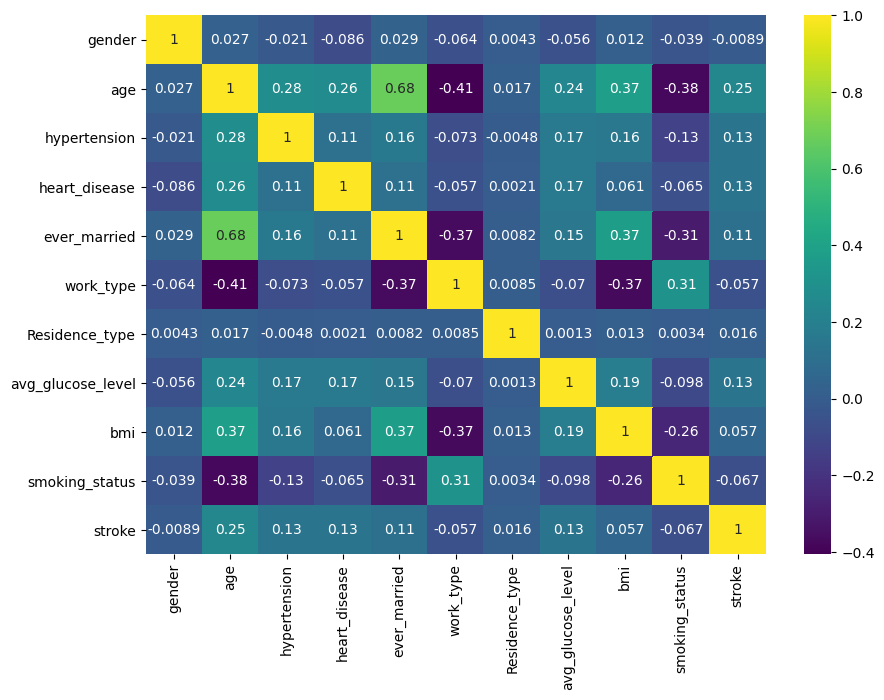

In [8]:
display(dataset.corr())
plt.figure(figsize = (10, 7))
sns.heatmap(dataset.corr(), cmap='viridis',annot=True)

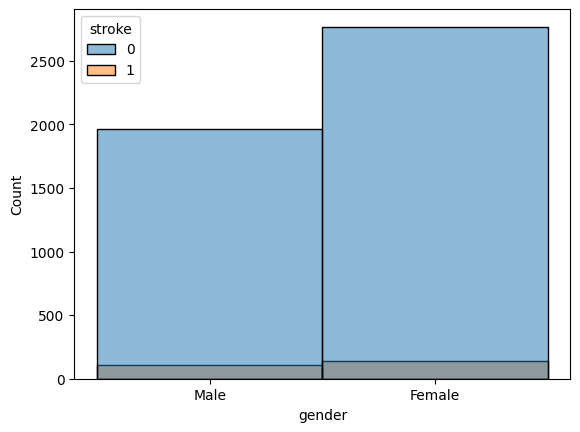

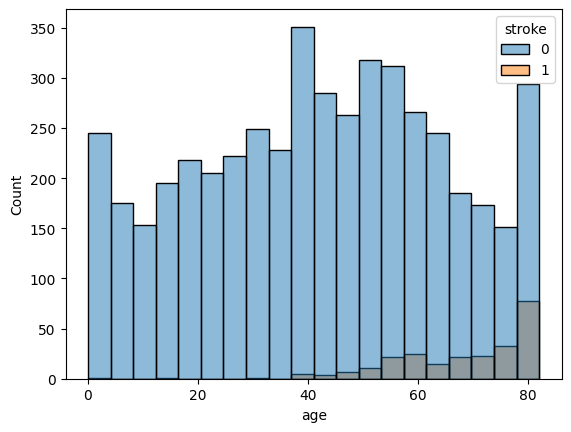

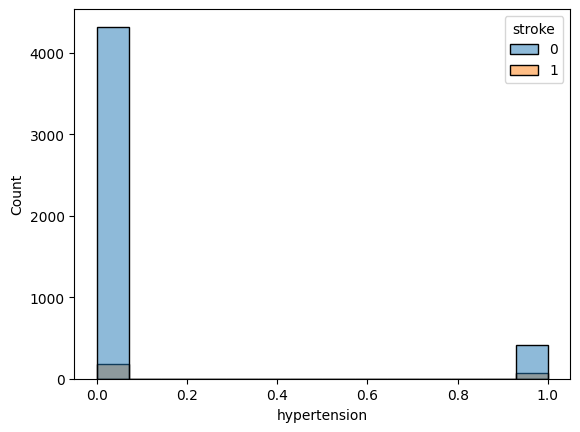

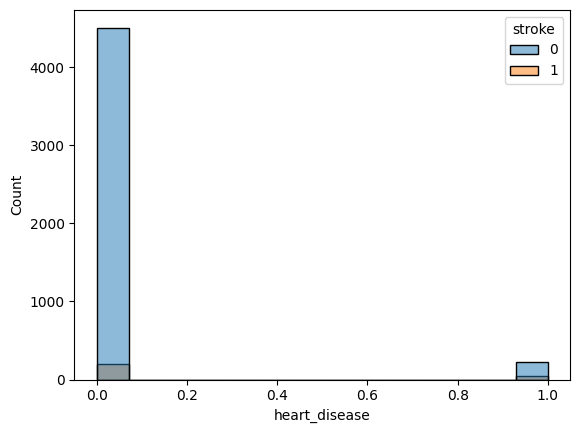

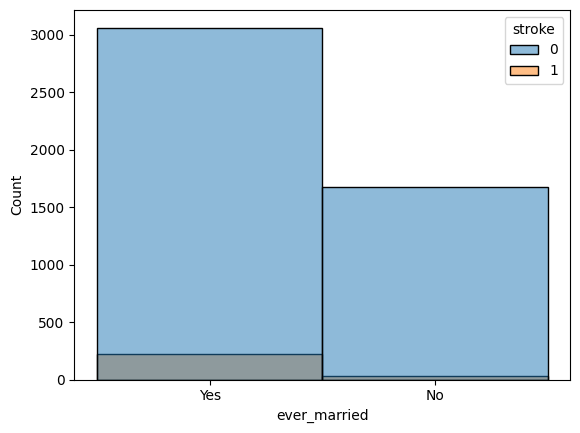

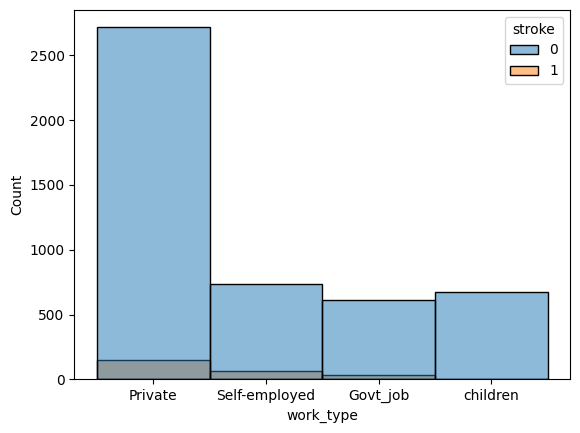

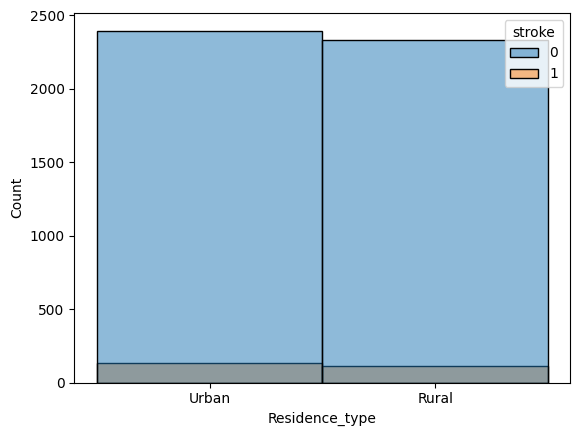

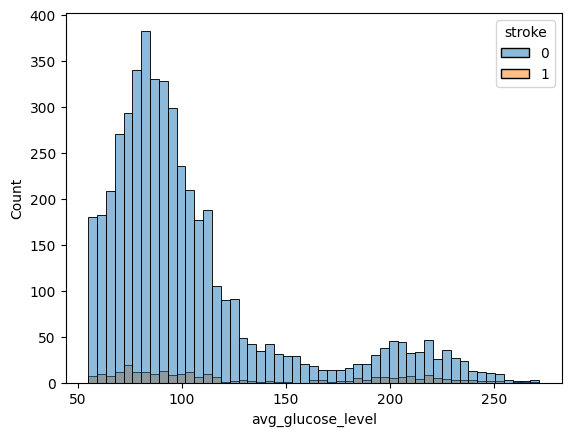

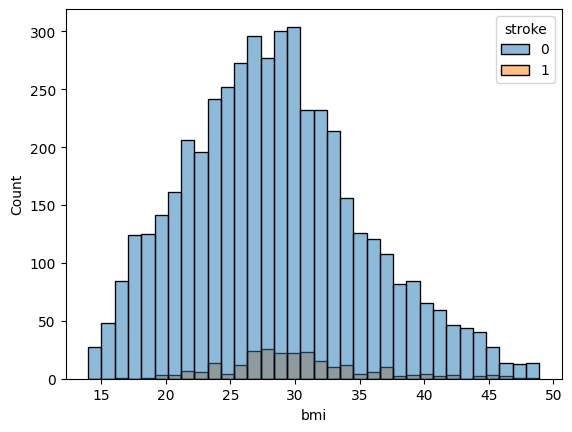

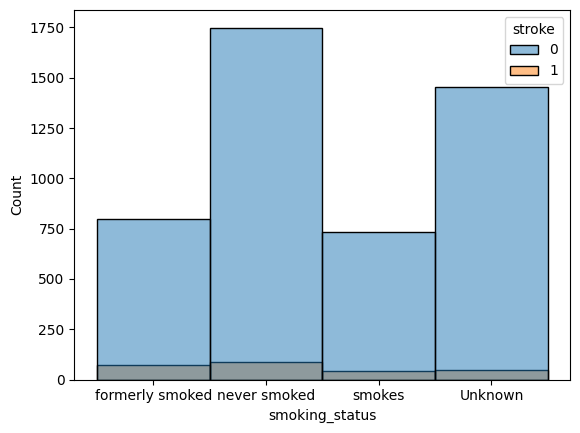

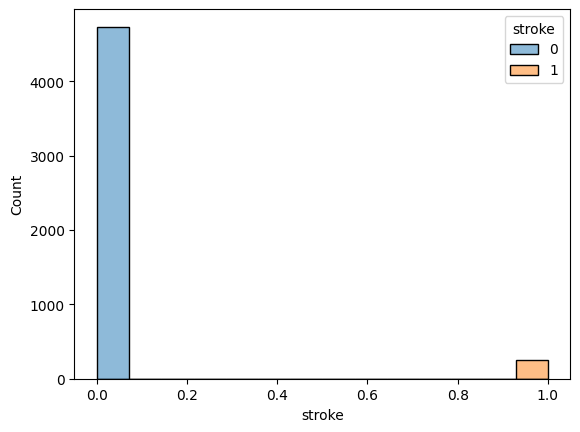

In [9]:
for i in temp_detaset.columns:
    sns.histplot(data=temp_detaset, x = i,hue = 'stroke')
    plt.show()

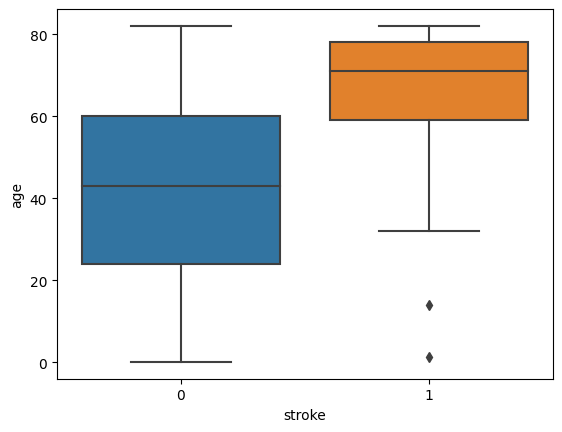

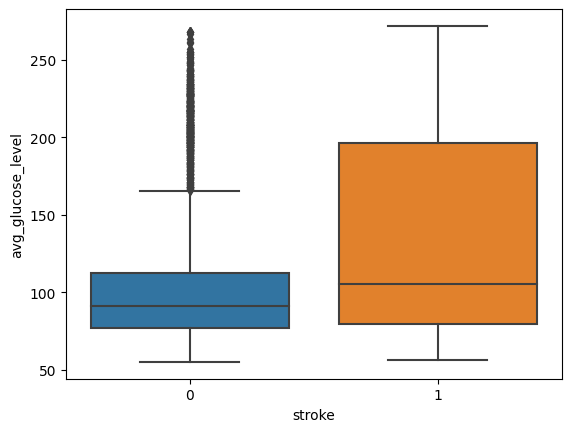

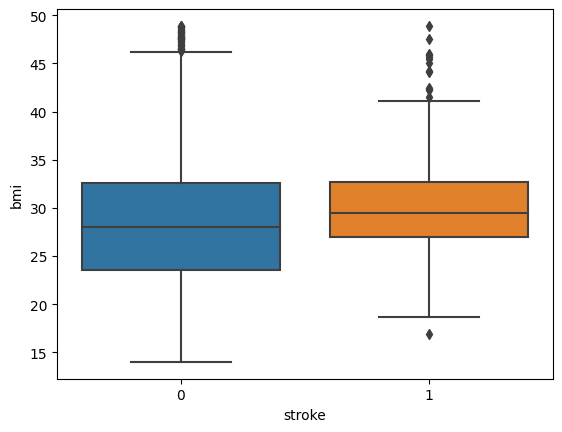

In [10]:
for i in dataset.columns:
    if i == 'stroke' or i == 'gender' or i == 'heart deases' or i=='hypertension' or i=='heart_disease' or i=='ever_married' or i=='Residence_type' or i=='smoking_status' or i=='work_type':
        continue
    else:
        plt.figure()
        sns.boxplot(y=dataset[str(i)],x=dataset['stroke'])

In [11]:
# sns.pairplot(data = dataset, hue = 'ever_married')


In [12]:
# Ми можемо побачити тут:

# - Жінки частіше страждають від інсульту
# - Одружені люди частіше хворіють на інсульт
# - У категорії Private work_type є більша ймовірність інсульту
# - Категорія «ніколи не курив» ​​має більшу ймовірність інсульту, також категорія, яка не має гіпертонії та серцевих захворювань, має більшу ймовірність інсульту
# - Люди старше 40 років частіше страждають від інсульту
# - Високий рівень ІМТ може призвести до інсульту
# - Люди з низьким рівнем глюкози частіше страждають від інсульту

# Train and test split

In [65]:
X = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify = dataset['stroke'])


# Нормалізовані дані

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 


# K Nearest Neighbors

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)


KNeighborsClassifier()

In [68]:
y_pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,y_pred))

[[2359    8]
 [ 122    2]]


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.20      0.02      0.03       124

    accuracy                           0.95      2491
   macro avg       0.58      0.51      0.50      2491
weighted avg       0.91      0.95      0.93      2491



In [70]:
print(accuracy_score(y_test,y_pred))

0.9478121236451225


In [71]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

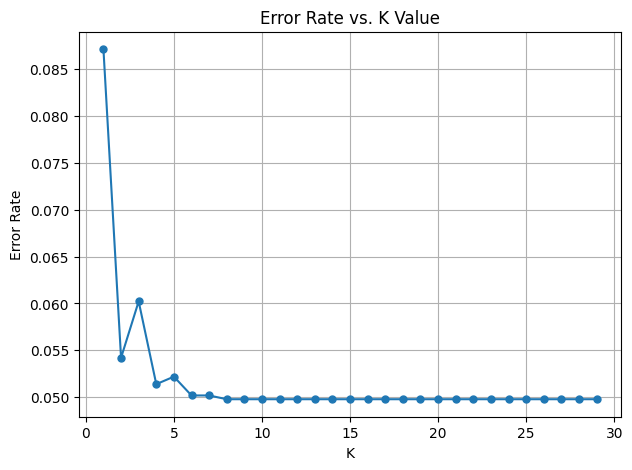

In [72]:
plt.figure(figsize=(7,5))
plt.plot(range(1,30), error_rate, marker='o', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))


[[2366    1]
 [ 124    0]]


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.00      0.00      0.00       124

    accuracy                           0.95      2491
   macro avg       0.48      0.50      0.49      2491
weighted avg       0.90      0.95      0.93      2491



In [23]:
print(accuracy_score(y_test,pred))

0.9498193496587716


# Decision Tree 

In [74]:
model = DecisionTreeClassifier(criterion='gini',max_depth=5) #criterion='gini'

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2367
           1       0.12      0.03      0.05       124

    accuracy                           0.94      2491
   macro avg       0.53      0.51      0.51      2491
weighted avg       0.91      0.94      0.92      2491



In [79]:
print(confusion_matrix(y_test, y_pred))

[[2337   30]
 [ 120    4]]


<Figure size 1500x1500 with 0 Axes>

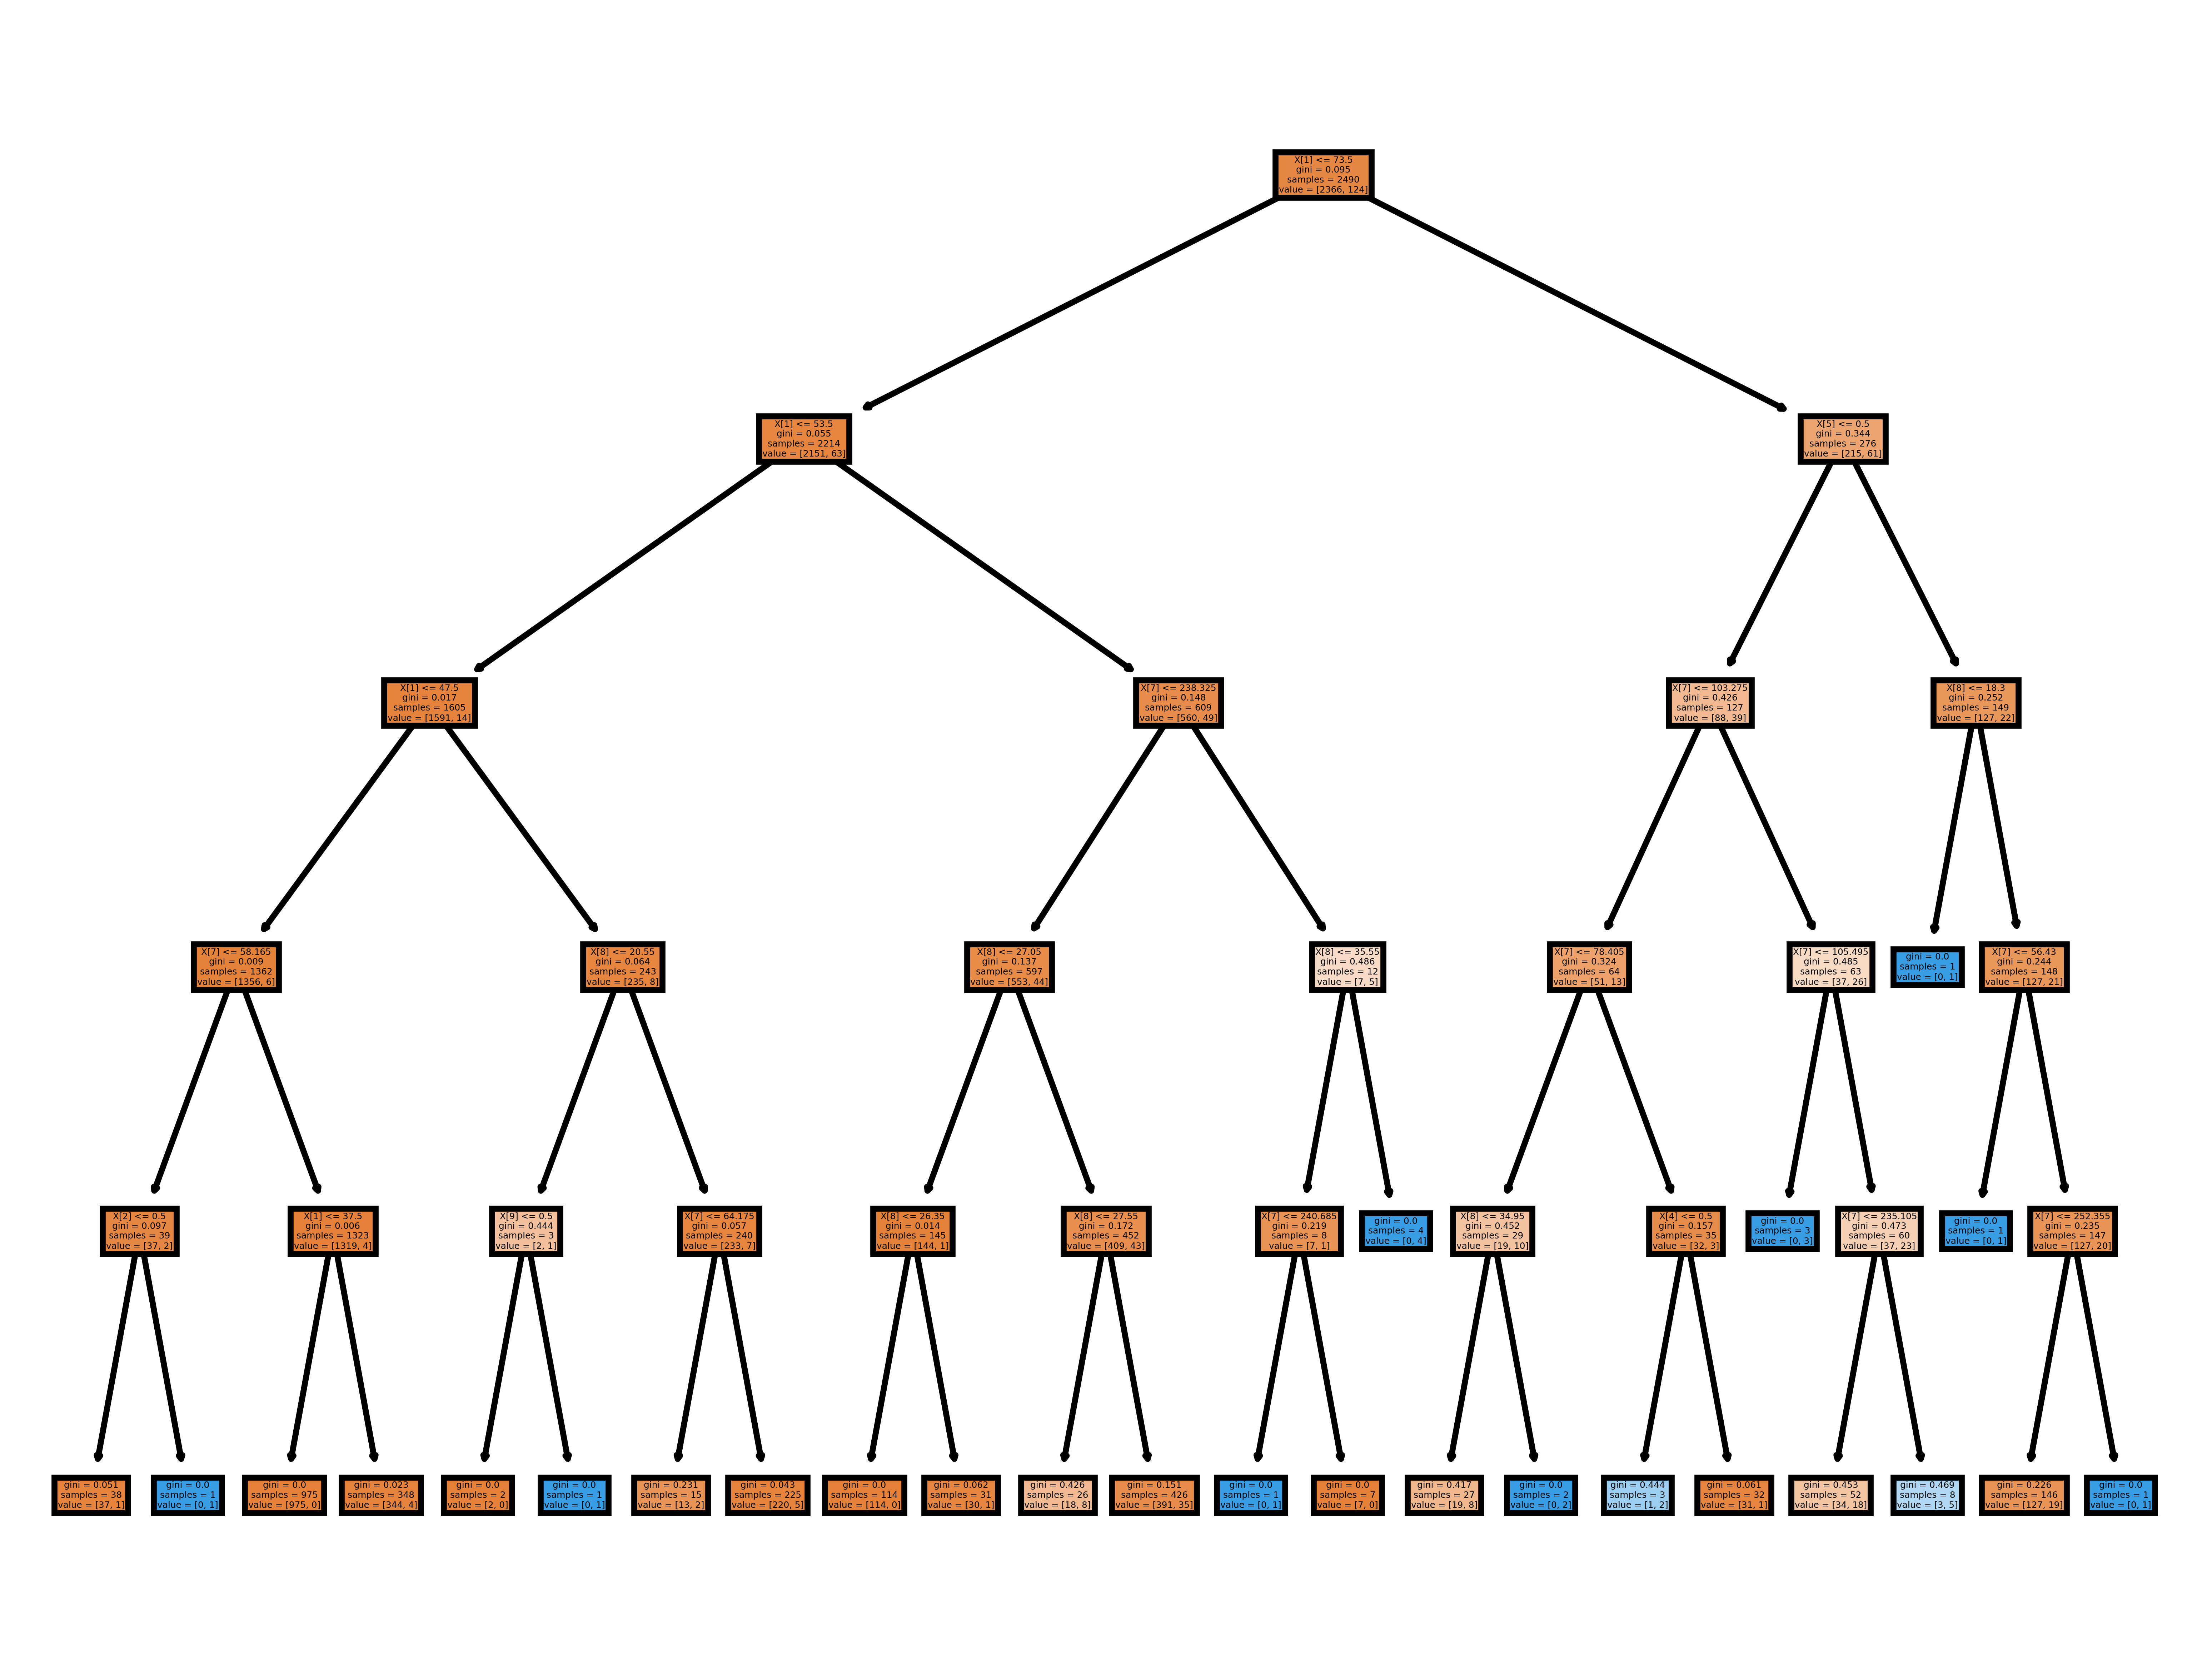

In [80]:
plt.figure(figsize = (15, 15))
plt.figure(dpi=1200)
plot_tree(model, filled = True)
plt.show()

#feature_names = ['gender',	'age',	'hypertension',	'heart_disease',	'ever_married',	'work_type',	'Residence_type',	'avg_glucose_level',	'bmi',	'smoking_status'], 

In [31]:
print(accuracy_score(y_test,y_pred))

0.9458048976314734


# Support Vector Machine

In [81]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [99]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'sigmoid')

In [100]:
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [101]:
y_pred = model.predict(scaled_X_test)

In [102]:
print(confusion_matrix(y_test, y_pred))

[[2273   94]
 [ 108   16]]


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2367
           1       0.15      0.13      0.14       124

    accuracy                           0.92      2491
   macro avg       0.55      0.54      0.55      2491
weighted avg       0.91      0.92      0.92      2491



In [106]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['sigmoid']} 

In [107]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [108]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']})

In [109]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [110]:
grid.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='sigmoid')

In [111]:
grid_predictions = grid.predict(scaled_X_test)

In [112]:
print(confusion_matrix(y_test,grid_predictions))

[[2364    3]
 [ 123    1]]


In [113]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2367
           1       0.25      0.01      0.02       124

    accuracy                           0.95      2491
   macro avg       0.60      0.50      0.49      2491
weighted avg       0.92      0.95      0.93      2491



In [114]:
print(accuracy_score(y_test,grid_predictions))

0.9494179044560418


# 	Random Forest

In [115]:
# https://hands-on.cloud/implementation-of-random-forest-algorithm-using-python/
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import delayed
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [116]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

for i in range (2, 23):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(X_train, y_train) 
    y_pred = forest.predict(X_test)
    print ('Number of tree: ', i)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)

Number of tree:  2
Accuracy:  0.9421918908069049
Number of tree:  3
Accuracy:  0.923323966278603
Number of tree:  4
Accuracy:  0.9437976716178241
Number of tree:  5
Accuracy:  0.9401846647932557
Number of tree:  6
Accuracy:  0.9425933360096347
Number of tree:  7
Accuracy:  0.9462063428342031
Number of tree:  8
Accuracy:  0.9446005620232838
Number of tree:  9
Accuracy:  0.941790445604175
Number of tree:  10
Accuracy:  0.9454034524287435
Number of tree:  11
Accuracy:  0.9462063428342031
Number of tree:  12
Accuracy:  0.9482135688478522
Number of tree:  13
Accuracy:  0.944199116820554
Number of tree:  14
Accuracy:  0.9482135688478522
Number of tree:  15
Accuracy:  0.9462063428342031
Number of tree:  16
Accuracy:  0.9470092332396628
Number of tree:  17
Accuracy:  0.9450020072260137
Number of tree:  18
Accuracy:  0.944199116820554
Number of tree:  19
Accuracy:  0.9450020072260137
Number of tree:  20
Accuracy:  0.9482135688478522
Number of tree:  21
Accuracy:  0.9458048976314734
Number of tr

In [117]:
forest = RandomForestClassifier (criterion='entropy', n_estimators = 6)
forest.fit(X_train, y_train) 
y_pred = forest.predict(X_test)

In [118]:
print(confusion_matrix(y_test, y_pred))

[[2352   15]
 [ 121    3]]


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2367
           1       0.17      0.02      0.04       124

    accuracy                           0.95      2491
   macro avg       0.56      0.51      0.51      2491
weighted avg       0.91      0.95      0.93      2491



In [120]:
accuracy_score(y_test, y_pred)

0.9454034524287435

# 	AdaBoost

In [121]:
# https://www.datacamp.com/tutorial/adaboost-classifier-python
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [126]:
abc = AdaBoostClassifier(n_estimators=50,random_state=0,learning_rate=1)


In [127]:
model = abc.fit(X_train, y_train)

In [128]:
y_pred = model.predict(X_test)

In [129]:
confusion_matrix(y_test, y_pred)

array([[2354,   13],
       [ 121,    3]])

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2367
           1       0.19      0.02      0.04       124

    accuracy                           0.95      2491
   macro avg       0.57      0.51      0.51      2491
weighted avg       0.91      0.95      0.93      2491



In [131]:
print(metrics.accuracy_score(y_test, y_pred))

0.9462063428342031
